# Домашнее задание "Продвинутая линейная алгебра".
## Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0  

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!  

Найдите собственные значения и собственные вектора матриц:  

m = np.array([[2, 2],  
              [1, 3]])  
print(m)
## Уровень 1:
Найдите спектральное разложение матрицы:

m = np.array([[1, 2],  
              [2,3]])  
print(m)  
Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [1]:
import numpy as np
from numpy import linalg as LA

### Уровень 0

In [2]:
# Диагональная, ортогональная, но не единичная(!)
MX = np.diag([-1, -1, -1, -1])
MXT = MX.T
print(MX)
print(MXT)
print(MX.dot(MXT))
print(LA.det(MX))

[[-1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0 -1]]
[[-1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0 -1]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
1.0


In [3]:
# Верхнетреугольная, ортогональная
# Нижнетреугольная, ортогональная
TR = [[-1,  0,  0],
      [ 0, -1,  0],
      [ 0,  0, -1]]
TR = np.array(TR)
print(TR)
print(TR.dot(TR.T))

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
# Матрица, у которой определитель = 1, и все элементы не равны 0

M = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 4]], dtype=np.float32)
det = np.linalg.det(M)
print("Матрица:\n", M)
print("Определитель:\n", det)

Матрица:
 [[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 4.]]
Определитель:
 1.0


In [5]:
# Найдите собственные значения и собственные вектора матриц:

m = np.array([[2, 2],
[1, 3]])
print("Матрица:\n", m)

w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Матрица:
 [[2 2]
 [1 3]]
Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1

In [6]:
# Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
[2,3]])
print("Матрица:\n", m)

Матрица:
 [[1 2]
 [2 3]]


In [7]:
a, U = LA.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [8]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


In [9]:
# Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. 
# В качестве метрики различия предлагаю использовать MSE.*

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [11]:
X, y = load_digits(return_X_y=True)

In [16]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [17]:
list_components = []
list_MSE = []

for i in range(1, 51, 2):
    pca = PCA(n_components=i)
    pca.fit(X)
    New_X = pca.transform(X)
    Original_X = pca.inverse_transform(New_X)
    MSE = mean_squared_error(X, Original_X)
    list_components.append(i)
    list_MSE.append(MSE)
    #print(f'Количество компонент: {i}')
    #print(f'Значение показателя MSE: {MSE}')
    #print('=====================================================================')

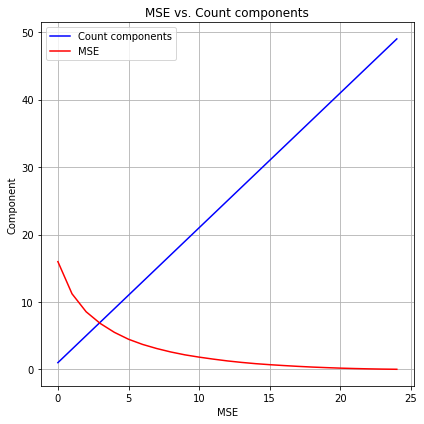

In [18]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('MSE vs. Count components')
plt.plot(list_components, 'b-', label='Count components')
plt.plot(list_MSE, 'r-', label='MSE')
plt.legend(loc='upper left')
plt.xlabel('MSE')
plt.ylabel('Component')
plt.grid(True)
fig.tight_layout()
plt.show()

### Вывод:
При увеличении числа компонент, MSE стремится к 0.